#1. Library imports and Data Load

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [35]:
df = pd.read_excel('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.xlsx')

#2. Exploratory Data Analysis

In [32]:
#checking null data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

In [36]:
#dropping duplicates
df = df.drop_duplicates()

In [34]:
df

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews,reviews.username,sourceURLs,word_count
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,I thought it would be as big as small paper bu...,llyyue,https://www.newegg.com/Product/Product.aspx%25...,42
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,This kindle is light and easy to use especiall...,Charmi,https://www.newegg.com/Product/Product.aspx%25...,20
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,Didnt know how much i'd use a kindle so went f...,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...,27
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,I am 100 happy with my purchase. I caught it o...,Kdperry,https://www.newegg.com/Product/Product.aspx%25...,150
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Solid entry level Kindle. Great for kids. Gift...,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,NaN,0,5,http://reviews.bestbuy.com/3545/5025900/review...,This is a great tablet for the price. Amazon i...,Good product,This is a great tablet for the price. Amazon i...,litle,"https://www.barcodable.com/upc/841667103150,ht...",15
4996,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,NaN,1,5,http://reviews.bestbuy.com/3545/5025900/review...,This tablet is t

count    4905.000000
mean       33.517839
std        46.184410
min         1.000000
25%        16.000000
50%        23.000000
75%        38.000000
max      1545.000000
Name: word_count, dtype: float64


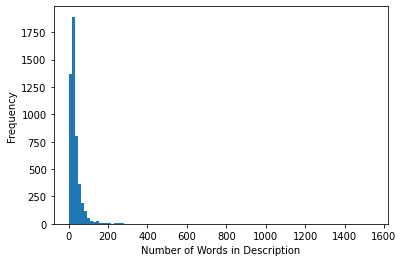

In [37]:
#word count distribution
df['word_count'] = df['reviews'].apply(lambda x: len(str(x).split(" ")))
print(df['word_count'].describe())
x = df['word_count']
n_bins = 100
plt.hist(x, bins=n_bins)
plt.xlabel('Number of Words in Description')
plt.ylabel('Frequency')
plt.show()

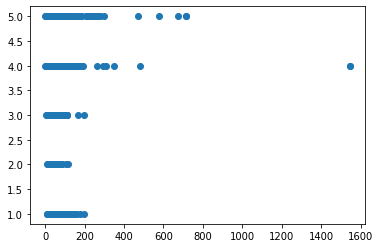

In [98]:
#plotting word counts with rating
plt.scatter(x=df['word_count'],y=df['reviews.rating'])

Looks like after 200 words the review ratings are mostlikely high (4-5).

#3. Data Clustering

##3.1. Vectorizing Text Data

In [58]:
tfid_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                  stop_words='english', 
                                  token_pattern="\\b[a-z][a-z]+\\b",
                                  lowercase=True,
                                  max_df = 0.6, max_features=4000)

tfid_data = tfid_vectorizer.fit_transform(df['reviews'])

##3.2. WordCloud Illustration

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


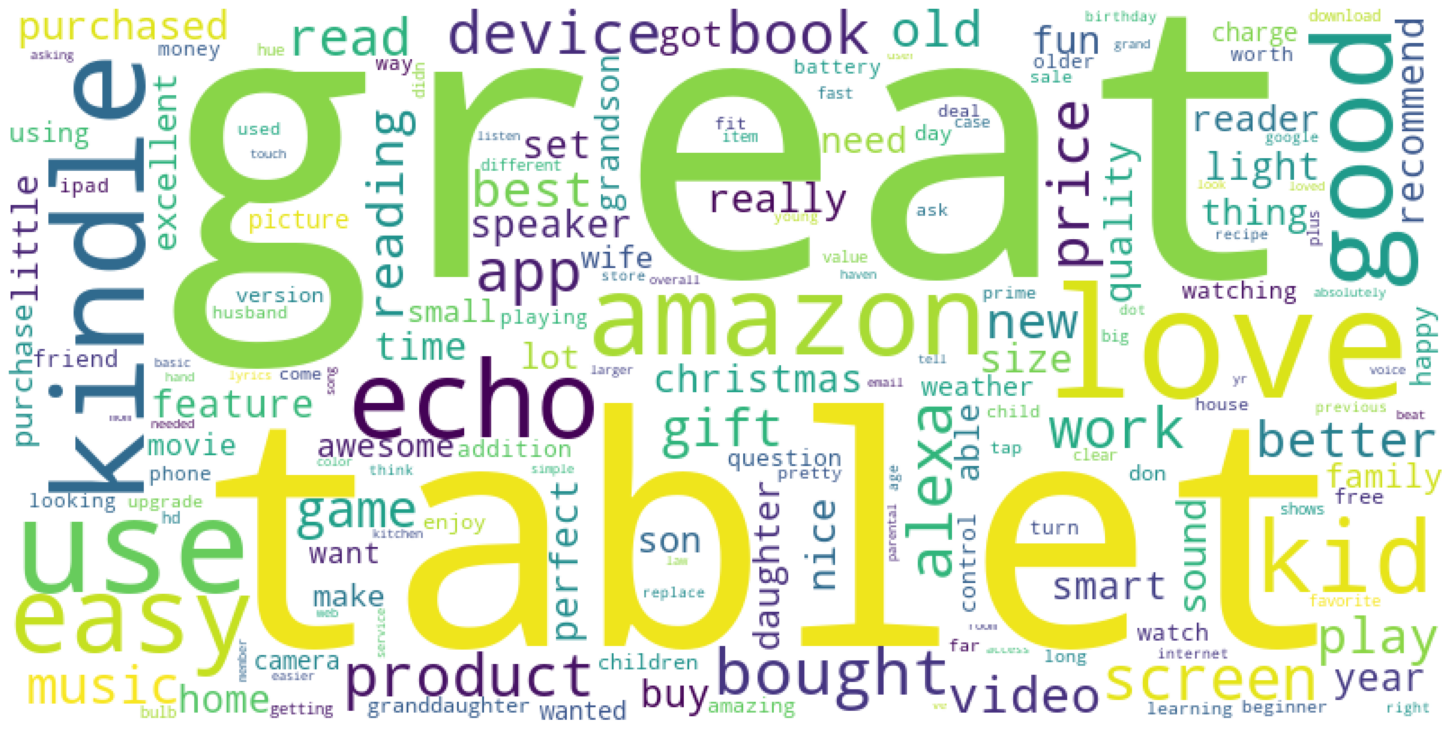

In [59]:
words = tfid_vectorizer.get_feature_names()
for_wordcloud_str = ' '.join(words)

wordcloud = WordCloud(width=800, height=400, background_color ='white',
                      min_font_size = 7).generate(for_wordcloud_str)

plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

Wordclouds shows most of our reviews are good.


##3.3. K-Means Clustering

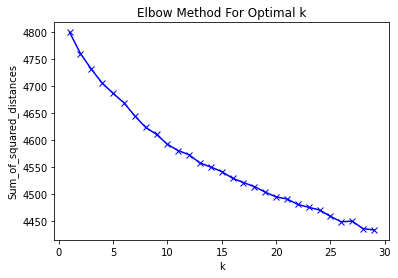

In [71]:
#try getting optimal k-value
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(tfid_data)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [92]:
#topic extraction using k-means clustering
kmeans = KMeans(n_clusters = 20)
kmeans.fit(tfid_data)

#this loop transforms the numbers back into words
common_words = kmeans.cluster_centers_.argsort()[:,:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : alexa, love, love alexa, echo, device, great, ask, new, like, house
1 : music, fun, great, speaker, device, alexa, sound, use, amazon, like
2 : kids, tablet, great, great kids, tablet kids, kids love, love, great tablet, games, good
3 : great, tablet, bought, buy, books, reading, better, screen, price, use
4 : awesome, product, awesome product, great, excellent, love, works, excellent product, happy, tablet
5 : loves, daughter, tablet, daughter loves, son, loves tablet, son loves, bought, granddaughter, great
6 : gift, bought, great gift, bought gift, christmas, great, loves, christmas gift, purchased, purchased gift
7 : battery, life, battery life, great, tablet, great battery, good, life great, kindle, long
8 : easy set, set, easy, set use, use, great, echo, product, love, great easy
9 : year old, year, old, tablet, loves, bought, bought year, tablet year, great, old loves
10 : easy use, easy, use, great, tablet, love, use great, product, kids, loves
11 : tablet, great tablet, gr

#4. Data Visualization

##4.1. Heatmap

Text(159.0, 0.5, 'cluster')

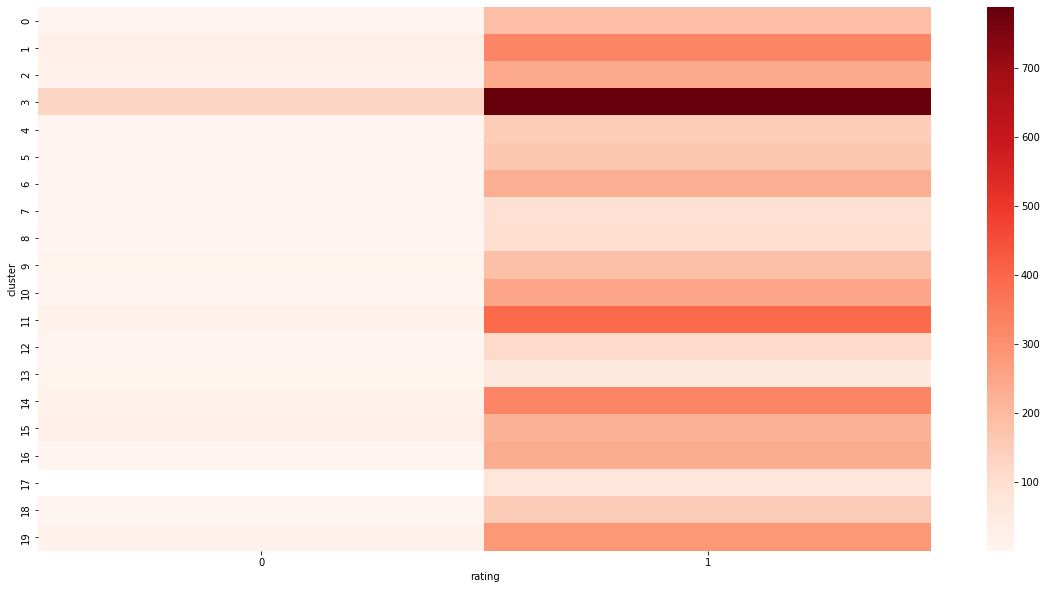

In [109]:
#separating ratings (value=1 for rating=4-5 and value=0 for rating=1-3)
df['rating'] = [1 if rating > 3 else 0 for rating in df['reviews.rating']]

df['cluster'] = kmeans.labels_
clusters = df.groupby(['cluster', 'rating']).size()
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(clusters.unstack(level = 'rating'), cmap = 'Reds')
ax.set_xlabel('rating')
ax.set_ylabel('cluster')

Most of the data lies in high rating(value=1) which is good. More detailed values can be seen using barplot.

##4.2. Barplot

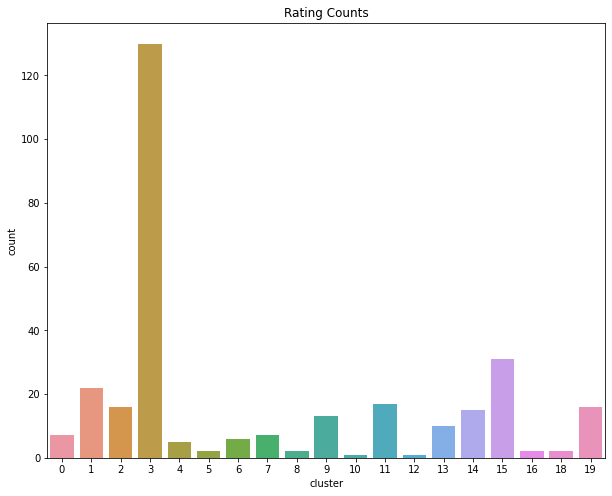

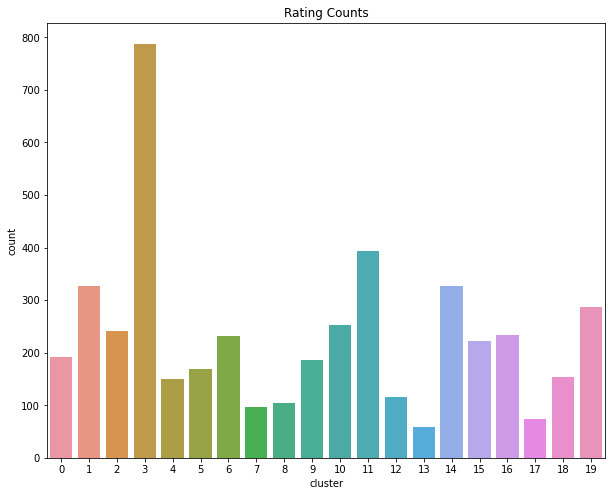

In [111]:
low_rating = df.loc[df['rating'] == 0]
high_rating = df.loc[df['rating'] == 1]

plt.figure(figsize=(10,8))
sns.countplot(x='cluster', data=low_rating).set_title("Rating Counts")
plt.show()
plt.figure(figsize=(10,8))
sns.countplot(x='cluster', data=high_rating).set_title("Rating Counts")
plt.show()

From bar plot we can see that the significant high-rated items are in cluster 5,10,16, and 17, which in the topics mainly talks about kids product that are easy to use. We should focus on getting these products ready and in good quality. 

##4.3. Clustering Illustration

Using TSNE, the data is firstly treated with dimentionality reduction and standard scaler to reduce the model's complexity, remove noises, and avoid overfitting.

In [60]:
#Dimentionality reduction
n_comp = 10
svd = TruncatedSVD(n_components=n_comp)
svd_data = svd.fit_transform(tfid_data)

In [62]:
#transform my reducer data using standardscaler
SS = StandardScaler()
data_scaled = SS.fit_transform(svd_data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 277 nearest neighbors...
[t-SNE] Indexed 4905 samples in 0.020s...
[t-SNE] Computed neighbors for 4905 samples in 2.301s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4905
[t-SNE] Computed conditional probabilities for sample 2000 / 4905
[t-SNE] Computed conditional probabilities for sample 3000 / 4905
[t-SNE] Computed conditional probabilities for sample 4000 / 4905
[t-SNE] Computed conditional probabilities for sample 4905 / 4905
[t-SNE] Mean sigma: 0.764129
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.645309
[t-SNE] KL divergence after 300 iterations: 1.296207


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


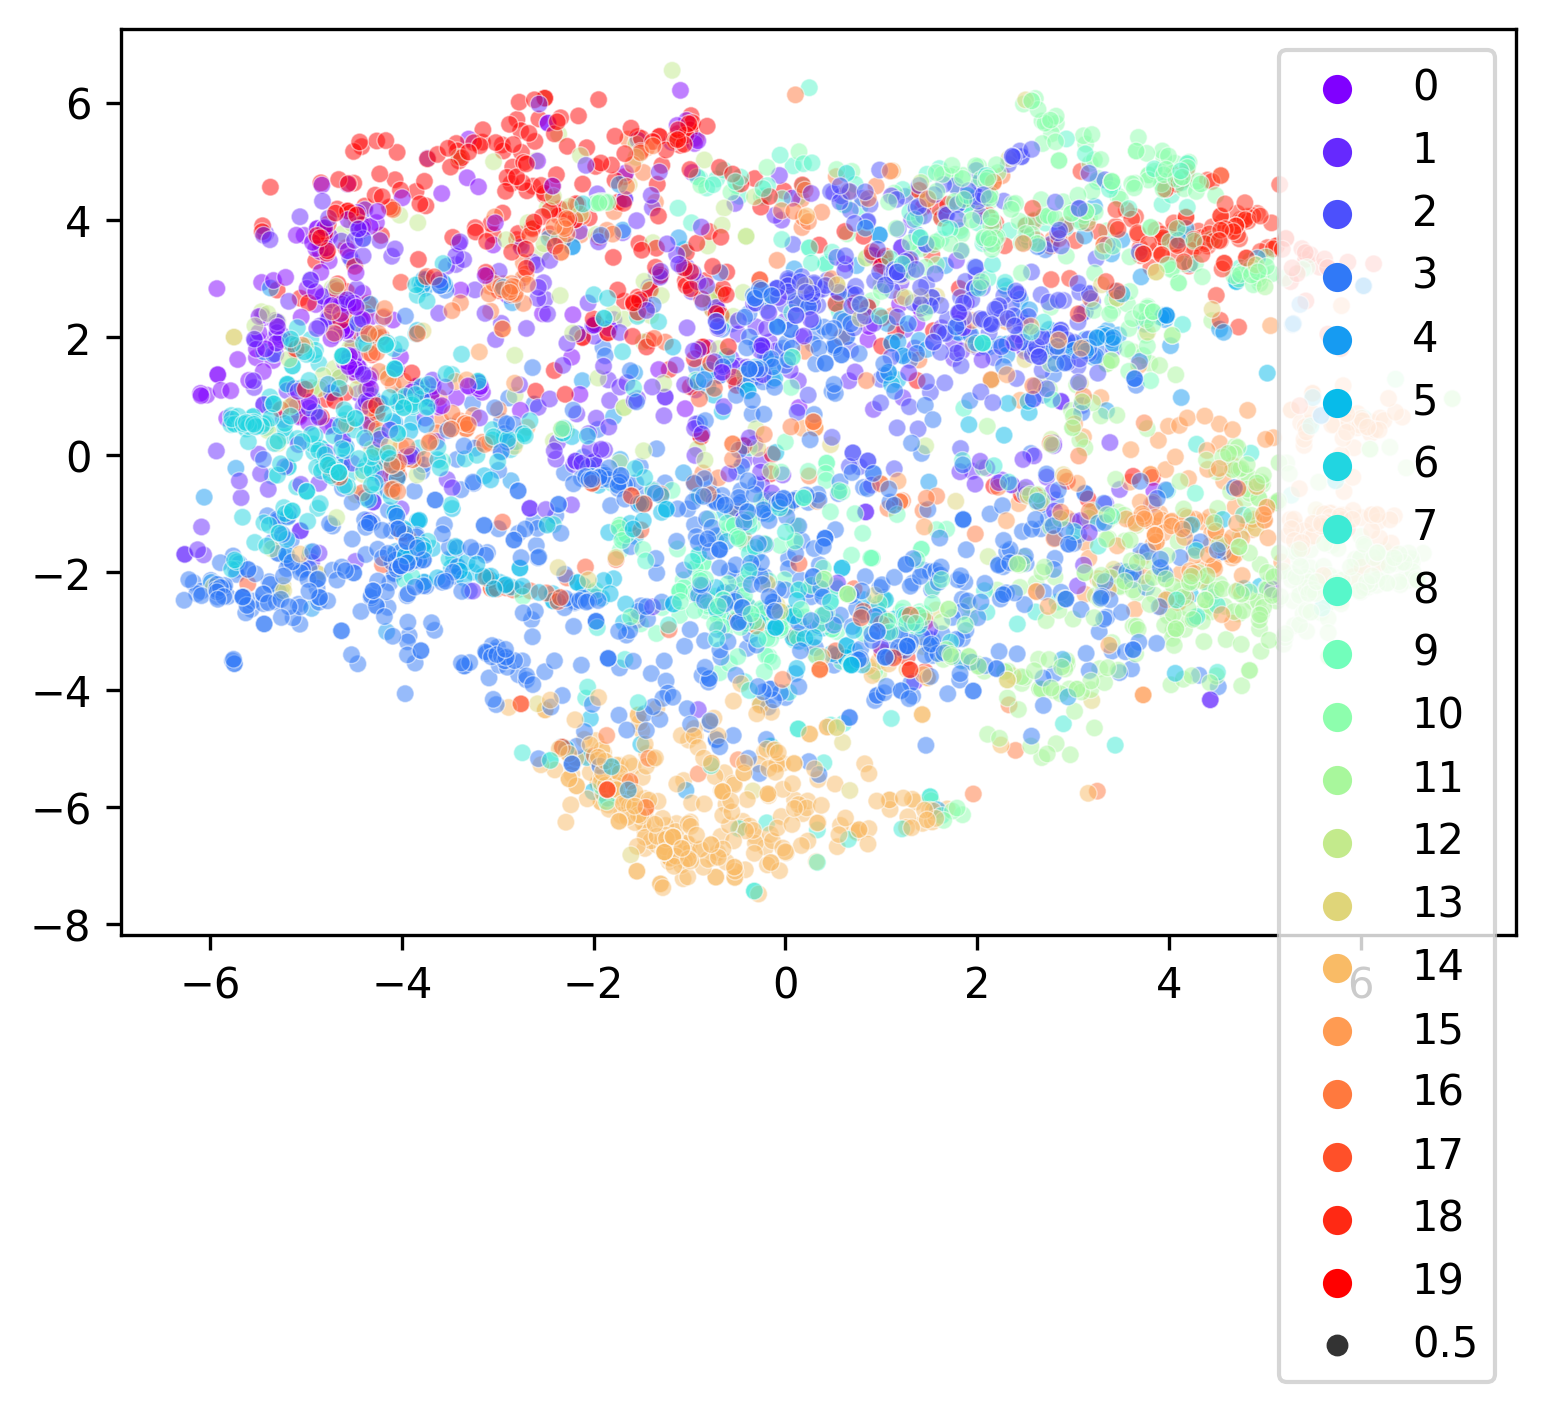

In [113]:
#3d tsne illustration
tsne = TSNE(n_components=3, verbose=1, perplexity=92, n_iter=300)
X_ne = tsne.fit_transform(data_scaled)

figsize=(20,10)
plt.figure(dpi=300)
sns.scatterplot(X_ne[:, 0], X_ne[:, 1], hue=kmeans.labels_, alpha=0.5, size = 0.5, palette='rainbow', legend='full');